# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [19]:
import os
import keras
import itertools

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [20]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer=keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_alyer'+str(i+1))(x)
    out=keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [24]:
## 超參數設定
LEARNING_RATE = [1e-2,1e-3,1e-4]
OPTIMIZER=['SGD','RMS','ADAGRAD','ADAM']
EPOCHS = 20
BATCH_SIZE = 256


In [26]:
results = {}
for optimizer,lr in itertools.product(OPTIMIZER,LEARNING_RATE):
    keras.backend.clear_session()
    print('Experiment with optimizer=%s,LR=%.6f' % (optimizer,lr))
    model=build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if optimizer=='SGD':
        opt=keras.optimizers.SGD(lr=lr)
    elif optimizer=='RMS':
        opt=keras.optimizers.RMSprop(lr=lr)
    elif optimizer=='ADAGRAD':
        opt=keras.optimizers.Adagrad(lr=lr)
    elif optimizer=='ADAM':
        opt=keras.optimizers.Adam(lr=lr)
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)  
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-optimizer-%s-lr-%s" % (optimizer, str(lr))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optimizer=SGD,LR=0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_alyer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_alyer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 48us/step - loss: 2.3833 - accuracy: 0.0984 - val_loss: 2.3234 - val_accuracy: 0.0998
Epoch 2/20
50000/50000 [==============================] - 2s 45us/step - loss: 2.2991 - accuracy: 0.1018 - val_loss: 2.2797 - val_accuracy: 0.1118
Epoch 3/20
50000/50000 [==============================] - 2s 46us/step - loss: 2.2703 - accuracy: 0.1316 - val_loss: 2.2604 - val_accuracy: 0.1521
Epoch 4/20
50000/50000 [==============================] - 2s 46us/step - loss: 2.2547 - accuracy: 0.1627 - val_loss: 2.2473 - val_accuracy: 0.1725
Epoch 5/20
50000/50000 [==============================] - 2s 46us/step - loss: 2.2428 - accuracy: 0.1776 - val_loss: 2.2363 - val_accuracy: 0.1825
Epoch 6/20
50000/50000 [==============================] - 2s 46us/step - loss: 2.2324 - accuracy: 0.1882 - val_loss: 2.2264 - val_accuracy: 0.1945
Epoch 7/20
50000/50000 [==============================] - 2s 46us/st

50000/50000 [==============================] - 3s 52us/step - loss: 2.2677 - accuracy: 0.2158 - val_loss: 1.9234 - val_accuracy: 0.2839
Epoch 2/20
50000/50000 [==============================] - 3s 57us/step - loss: 1.8942 - accuracy: 0.3148 - val_loss: 1.8439 - val_accuracy: 0.3297
Epoch 3/20
50000/50000 [==============================] - 3s 56us/step - loss: 1.7822 - accuracy: 0.3596 - val_loss: 1.7753 - val_accuracy: 0.3652
Epoch 4/20
50000/50000 [==============================] - 3s 52us/step - loss: 1.7109 - accuracy: 0.3881 - val_loss: 1.7667 - val_accuracy: 0.3807
Epoch 5/20
50000/50000 [==============================] - 2s 50us/step - loss: 1.6546 - accuracy: 0.4064 - val_loss: 1.6810 - val_accuracy: 0.3917
Epoch 6/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.6056 - accuracy: 0.4276 - val_loss: 1.6629 - val_accuracy: 0.4086
Epoch 7/20
50000/50000 [==============================] - 3s 51us/step - loss: 1.5714 - accuracy: 0.4367 - val_loss: 1.5615 - val

50000/50000 [==============================] - 3s 51us/step - loss: 3.0316 - accuracy: 0.2291 - val_loss: 1.9122 - val_accuracy: 0.3161
Epoch 2/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.8603 - accuracy: 0.3300 - val_loss: 1.8229 - val_accuracy: 0.3461
Epoch 3/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.7643 - accuracy: 0.3696 - val_loss: 1.7508 - val_accuracy: 0.3626
Epoch 4/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.7016 - accuracy: 0.3921 - val_loss: 1.7378 - val_accuracy: 0.3776
Epoch 5/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.6596 - accuracy: 0.4092 - val_loss: 1.6675 - val_accuracy: 0.4016
Epoch 6/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.6200 - accuracy: 0.4243 - val_loss: 1.6297 - val_accuracy: 0.4184
Epoch 7/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.5913 - accuracy: 0.4360 - val_loss: 1.6637 - val

50000/50000 [==============================] - 3s 50us/step - loss: 2.0855 - accuracy: 0.2765 - val_loss: 1.9909 - val_accuracy: 0.3164
Epoch 2/20
50000/50000 [==============================] - 2s 49us/step - loss: 1.9566 - accuracy: 0.3279 - val_loss: 1.9235 - val_accuracy: 0.3373
Epoch 3/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.9072 - accuracy: 0.3442 - val_loss: 1.8868 - val_accuracy: 0.3500
Epoch 4/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.8775 - accuracy: 0.3530 - val_loss: 1.8633 - val_accuracy: 0.3567
Epoch 5/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.8565 - accuracy: 0.3589 - val_loss: 1.8462 - val_accuracy: 0.3595
Epoch 6/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.8401 - accuracy: 0.3635 - val_loss: 1.8317 - val_accuracy: 0.3690
Epoch 7/20
50000/50000 [==============================] - 2s 48us/step - loss: 1.8268 - accuracy: 0.3669 - val_loss: 1.8189 - val

50000/50000 [==============================] - 3s 56us/step - loss: 1.9542 - accuracy: 0.2944 - val_loss: 1.7815 - val_accuracy: 0.3645
Epoch 2/20
50000/50000 [==============================] - 3s 53us/step - loss: 1.7148 - accuracy: 0.3882 - val_loss: 1.6681 - val_accuracy: 0.4033
Epoch 3/20
50000/50000 [==============================] - 3s 53us/step - loss: 1.6289 - accuracy: 0.4198 - val_loss: 1.6282 - val_accuracy: 0.4171
Epoch 4/20
50000/50000 [==============================] - 3s 53us/step - loss: 1.5680 - accuracy: 0.4388 - val_loss: 1.5721 - val_accuracy: 0.4307
Epoch 5/20
50000/50000 [==============================] - 3s 54us/step - loss: 1.5211 - accuracy: 0.4544 - val_loss: 1.5232 - val_accuracy: 0.4555
Epoch 6/20
50000/50000 [==============================] - 3s 53us/step - loss: 1.4827 - accuracy: 0.4709 - val_loss: 1.4982 - val_accuracy: 0.4694
Epoch 7/20
50000/50000 [==============================] - 3s 53us/step - loss: 1.4435 - accuracy: 0.4866 - val_loss: 1.5315 - val

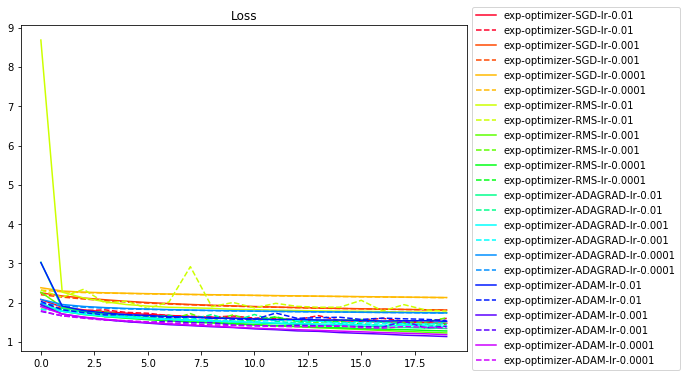

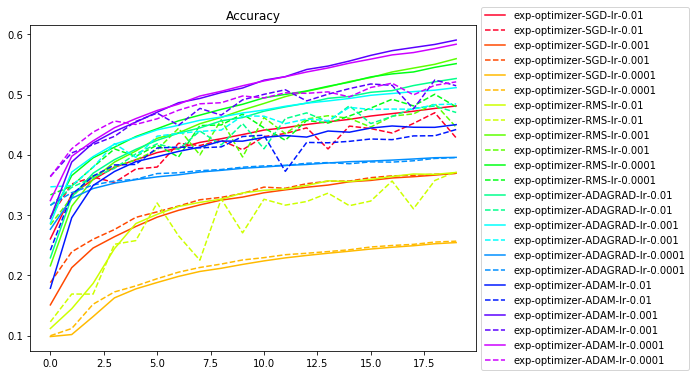

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()